# Imports

In [1]:
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.layers import LSTM , Dropout , Dense
from tensorflow.keras.models import Sequential
import pandas_datareader.data as web
import datetime

import datetime
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
start = datetime.datetime(2011 , 1 , 1)
end= datetime.datetime.now()
df = web.DataReader('^NSEI' , 'yahoo' , start , end)
df.drop(['Volume' , 'Adj Close'] , axis=1 , inplace=True)

In [3]:
df['pct_change'] = df['Close'].pct_change()

In [4]:
df.dropna(inplace=True)

In [5]:
data = df['pct_change'].copy()

In [6]:
# Training and testing data
train_size = int(len(data) *0.80)
train = data[:train_size]
test = data[train_size :]

In [7]:
X_train = []
y_train = []

for i in range(60,len(train)-1):
    X_train.append(train[i-60:i])
    
    y_train.append(train[i])

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [9]:
X_train[1] , y_train[0]

(array([-1.08276118e-02, -5.18928348e-03, -2.37506555e-02, -2.40067062e-02,
        -1.51834593e-03,  1.89690656e-02, -1.89911905e-02, -1.69248595e-02,
         3.54042885e-05,  1.22551492e-02, -5.76514900e-03,  3.61098456e-03,
        -2.64375961e-03,  8.20679365e-03, -9.72447615e-03, -1.46112633e-02,
        -1.64427146e-02, -1.13385886e-03, -1.61099382e-02,  2.73200254e-03,
         1.74429308e-02, -2.37028995e-02,  4.63327619e-05, -1.54651956e-02,
        -1.11057782e-02, -5.28214275e-03,  1.61124035e-02,  2.74952919e-02,
         4.58211144e-03,  1.27749555e-04,  1.18120287e-02, -1.57758561e-02,
         1.09269915e-02, -8.95152783e-03, -5.82353846e-03, -3.21204078e-02,
         7.76210080e-03,  5.60005966e-03,  3.54473922e-02,  2.51713799e-03,
         4.60569452e-04, -1.36493067e-02,  1.05525024e-02,  1.84759377e-03,
        -6.61726589e-03, -8.90901789e-03,  1.58021470e-02, -1.47970890e-02,
         1.12851286e-02, -1.17035467e-02, -1.33935003e-02, -1.66555539e-03,
         9.1

In [10]:
X_test = []
y_test = []

for i in range(60,len(test)-1):
    X_test.append(test[i-60 :i])
    
    y_test.append(test[i])

In [11]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
lstm = Sequential()
lstm.add(LSTM(60 ,return_sequences=True ,  input_shape=(60,1)))
lstm.add(LSTM(60 , return_sequences = True))
lstm.add(LSTM(60))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy','mse'])

In [13]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [14]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='./models/lstmYahooPctChange/',
                                              save_weights_only=True,
                                              verbose=1)

In [15]:
X_train = X_train.reshape((-1 ,60 , 1))
X_test = X_test.reshape((-1,60,1))

In [16]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [17]:
lstm.fit(X_train ,y_train , validation_data=(X_test,y_test) ,epochs=100 , batch_size=64 ,verbose=1 , callbacks=[callback] )

Epoch 1/100
31/31 [==============================] - 8s 130ms/step - loss: 1.6751e-04 - accuracy: 0.0017 - mse: 1.6751e-04 - val_loss: 2.7117e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7117e-04

Epoch 00001: saving model to ./models/lstmYahooPctChange/
Epoch 2/100
31/31 [==============================] - 3s 84ms/step - loss: 9.9445e-05 - accuracy: 0.0012 - mse: 9.9445e-05 - val_loss: 2.7125e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7125e-04

Epoch 00002: saving model to ./models/lstmYahooPctChange/
Epoch 3/100
31/31 [==============================] - 3s 84ms/step - loss: 9.6888e-05 - accuracy: 0.0015 - mse: 9.6888e-05 - val_loss: 2.7118e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7118e-04

Epoch 00003: saving model to ./models/lstmYahooPctChange/
Epoch 4/100
31/31 [==============================] - 3s 85ms/step - loss: 8.9133e-05 - accuracy: 0.0011 - mse: 8.9133e-05 - val_loss: 2.7152e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7152e-04

Epoch 00004: saving model to ./models/lstmYah

31/31 [==============================] - 2s 77ms/step - loss: 9.1824e-05 - accuracy: 0.0011 - mse: 9.1824e-05 - val_loss: 2.7127e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7127e-04

Epoch 00033: saving model to ./models/lstmYahooPctChange/
Epoch 34/100
31/31 [==============================] - 2s 76ms/step - loss: 9.0781e-05 - accuracy: 0.0027 - mse: 9.0781e-05 - val_loss: 2.7213e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7213e-04

Epoch 00034: saving model to ./models/lstmYahooPctChange/
Epoch 35/100
31/31 [==============================] - 2s 76ms/step - loss: 9.2398e-05 - accuracy: 0.0011 - mse: 9.2398e-05 - val_loss: 2.7127e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7127e-04

Epoch 00035: saving model to ./models/lstmYahooPctChange/
Epoch 36/100
31/31 [==============================] - 2s 76ms/step - loss: 9.8674e-05 - accuracy: 0.0022 - mse: 9.8674e-05 - val_loss: 2.7179e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7179e-04

Epoch 00036: saving model to ./models/lstmYahooPctChang

31/31 [==============================] - 2s 80ms/step - loss: 9.5826e-05 - accuracy: 0.0016 - mse: 9.5826e-05 - val_loss: 2.7118e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7118e-04

Epoch 00065: saving model to ./models/lstmYahooPctChange/
Epoch 66/100
31/31 [==============================] - 2s 80ms/step - loss: 9.5288e-05 - accuracy: 0.0012 - mse: 9.5288e-05 - val_loss: 2.7955e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7955e-04

Epoch 00066: saving model to ./models/lstmYahooPctChange/
Epoch 67/100
31/31 [==============================] - 2s 80ms/step - loss: 9.2325e-05 - accuracy: 0.0014 - mse: 9.2325e-05 - val_loss: 2.7116e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7116e-04

Epoch 00067: saving model to ./models/lstmYahooPctChange/
Epoch 68/100
31/31 [==============================] - 2s 80ms/step - loss: 9.3176e-05 - accuracy: 0.0026 - mse: 9.3176e-05 - val_loss: 2.7486e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7486e-04

Epoch 00068: saving model to ./models/lstmYahooPctChang

31/31 [==============================] - 3s 81ms/step - loss: 8.5212e-05 - accuracy: 0.0013 - mse: 8.5212e-05 - val_loss: 2.7117e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7117e-04

Epoch 00097: saving model to ./models/lstmYahooPctChange/
Epoch 98/100
31/31 [==============================] - 3s 81ms/step - loss: 9.3067e-05 - accuracy: 9.5676e-04 - mse: 9.3067e-05 - val_loss: 2.7669e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7669e-04

Epoch 00098: saving model to ./models/lstmYahooPctChange/
Epoch 99/100
31/31 [==============================] - 2s 81ms/step - loss: 9.4052e-05 - accuracy: 0.0022 - mse: 9.4052e-05 - val_loss: 2.7206e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7206e-04

Epoch 00099: saving model to ./models/lstmYahooPctChange/
Epoch 100/100
31/31 [==============================] - 3s 81ms/step - loss: 9.2741e-05 - accuracy: 0.0022 - mse: 9.2741e-05 - val_loss: 2.7116e-04 - val_accuracy: 0.0000e+00 - val_mse: 2.7116e-04

Epoch 00100: saving model to ./models/lstmYahooPct

In [40]:
lstm.save('./models/lstmYahooPctChange/lstmyahooPctChange.h5')

In [18]:
training_predictions = lstm.predict(X_train)

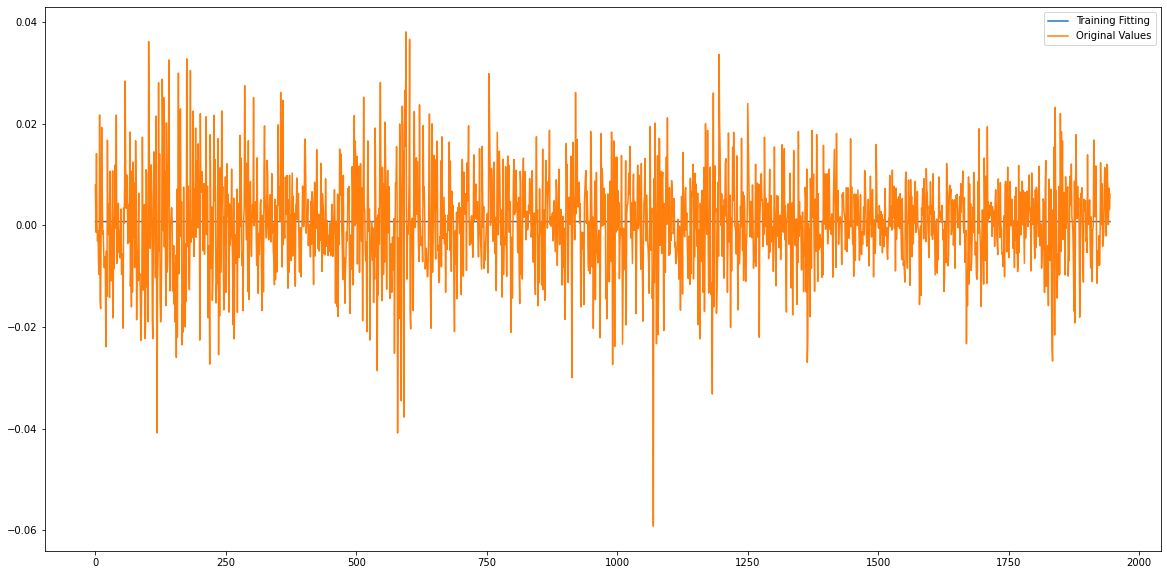

In [25]:
plt.figure(figsize=(20,10))
plt.plot(training_predictions , label='Training Fitting')
plt.plot(np.array(y_train).reshape(-1,1) ,label='Original Values')
plt.legend()
plt.show()

In [44]:
preds = lstm.predict(X_test)

In [45]:
print('Mean Squared Error : {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds) )))
print('Mean Absolute Error : {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds))))

Mean Squared Error : 69342.47349874506
Mean Absolute Error : 195.32101558071156


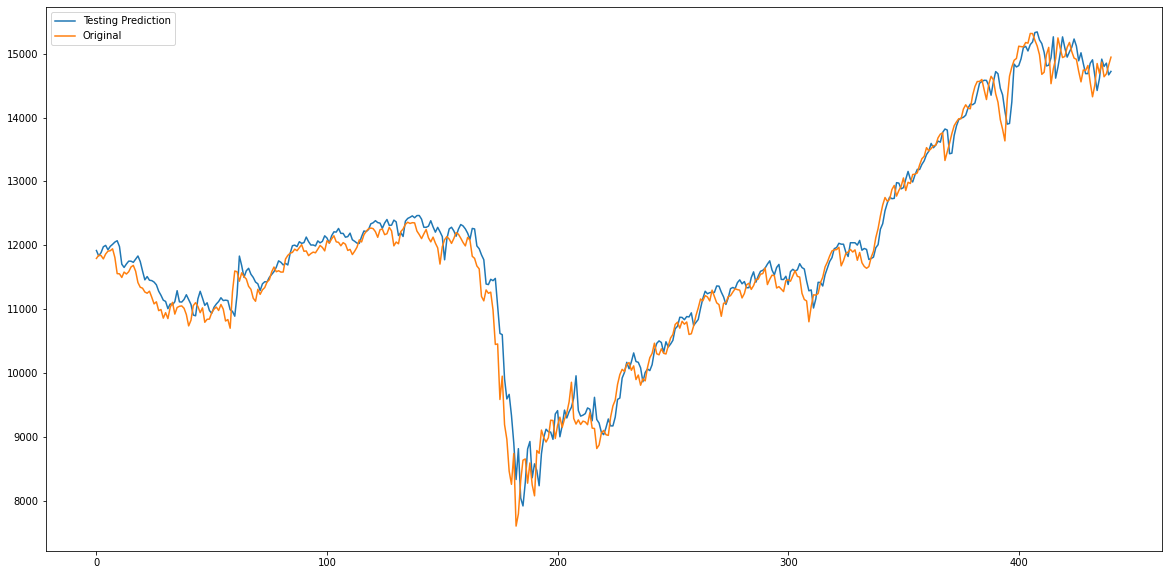

In [46]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(preds) , label='Testing Prediction')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,label='Original')
plt.legend()
plt.show()

In [47]:
scaled_original = scaler.inverse_transform(np.array(y_test).reshape(-1,1))
scaled_lstm10 = scaler.inverse_transform(preds)

In [48]:
scaled_original = scaled_original.reshape(1,-1).tolist()
scaled_lstm10  = scaled_lstm10.reshape(1,-1).tolist()

In [49]:
index = test[61:].index

In [50]:
data = {'Original':scaled_original[0] ,
        'last 10 years model prediction': scaled_lstm10[0]}

In [51]:
df = pd.DataFrame(data=data , index =index)

In [60]:
df.loc['2021-01':]

,Original,last 10 years model prediction
Date,,
2021-01-04,14132.900391,14003.275391
2021-01-05,14199.500000,14036.240234
2021-01-06,14146.250000,14147.371094
2021-01-07,14137.349609,14210.018555
2021-01-08,14347.250000,14200.517578
...,...,...
2021-04-01,14867.349609,14913.712891
2021-04-05,14637.799805,14798.993164
2021-04-06,14683.500000,14850.529297


In [61]:
df.to_csv('./yahooTraining.csv')

In [53]:
print('Mean Absolute Percentage Error : {}'.format(mean_absolute_percentage_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds) )))

Mean Absolute Percentage Error : 0.01748055368232875


In [55]:
print('Mean Absolute Percentage Error : {}'.format(mean_absolute_percentage_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions) )))

Mean Absolute Percentage Error : 0.013978968692187382


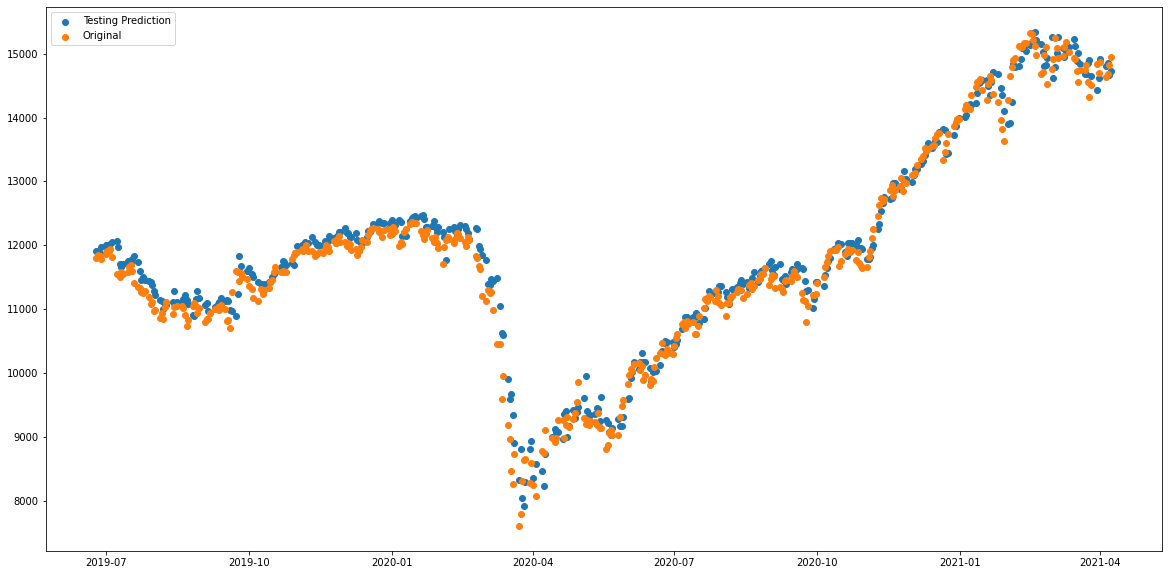

In [57]:
plt.figure(figsize=(20,10))
plt.scatter(index , scaler.inverse_transform(preds) , label='Testing Prediction')
plt.scatter(index , scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,label='Original')
plt.legend()
plt.show()

In [63]:
df['pct_change_original']= df['Original'].pct_change()
df['pct_change_predicted']= df['last 10 years model prediction'].pct_change()

In [64]:
df.head()

,Original,last 10 years model prediction,pct_change_original,pct_change_predicted
Date,,,,
2019-06-25,11796.450195,11920.332031,NaN,NaN
2019-06-26,11847.549805,11834.791992,0.004332,-0.007176
2019-06-27,11841.549805,11886.591797,-0.000506,0.004377
2019-06-28,11788.849609,11978.667969,-0.004450,0.007746
2019-07-01,11865.599609,12000.480469,0.006510,0.001821


740.6484375
-1201.662109375


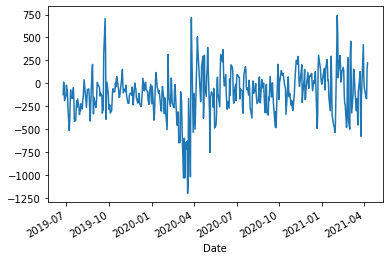

In [94]:
diff = df['Original']- df['last 10 years model prediction']
print(diff.max())
print(diff.min())
diff.plot()
plt.show()

In [91]:
df.loc['2020-03']

,Original,last 10 years model prediction,pct_change_original,pct_change_predicted
Date,,,,
2020-03-02,11132.750000,11776.157227,-0.006160,-0.006419
2020-03-03,11303.299805,11396.615234,0.015320,-0.032230
2020-03-04,11251.000000,11387.416992,-0.004627,-0.000807
2020-03-05,11269.000000,11470.037109,0.001600,0.007255
2020-03-06,10989.450195,11448.619141,-0.024807,-0.001867
2020-03-09,10451.450195,11483.953125,-0.048956,0.003086
2020-03-11,10458.400391,11057.216797,0.000665,-0.037159
2020-03-12,9590.150391,10623.282227,-0.083019,-0.039244
2020-03-13,9955.200195,10604.356445,0.038065,-0.001782


In [97]:
df.loc['2020-12']

,Original,last 10 years model prediction,pct_change_original,pct_change_predicted
Date,,,,
2020-12-01,13109.049805,12991.564453,0.010803,-0.003357
2020-12-02,13113.750000,13103.466797,0.000359,0.008613
2020-12-03,13133.900391,13189.272461,0.001537,0.006548
2020-12-04,13258.549805,13187.443359,0.009491,-0.000139
2020-12-07,13355.750000,13267.393555,0.007331,0.006063
2020-12-08,13392.950195,13324.254883,0.002785,0.004286
2020-12-09,13529.099609,13421.359375,0.010166,0.007288
2020-12-10,13478.299805,13474.175781,-0.003755,0.003935
2020-12-11,13513.849609,13595.227539,0.002638,0.008984


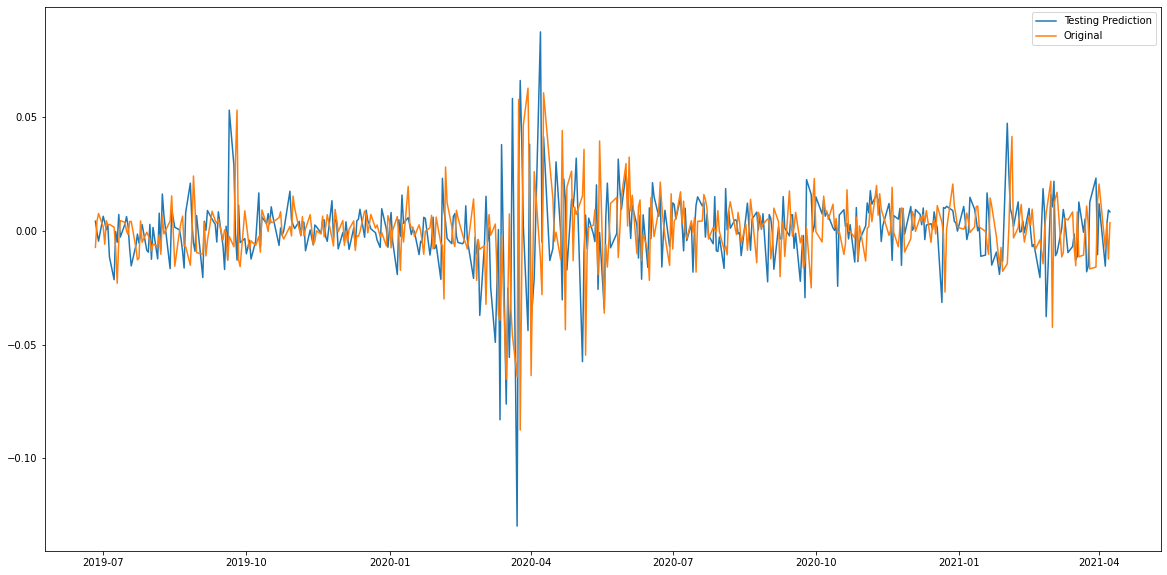

In [67]:
plt.figure(figsize=(20,10))
plt.plot(index , df['pct_change_original'] , label='Testing Prediction')
plt.plot(index , df['pct_change_predicted'] ,label='Original')
plt.legend()
plt.show()

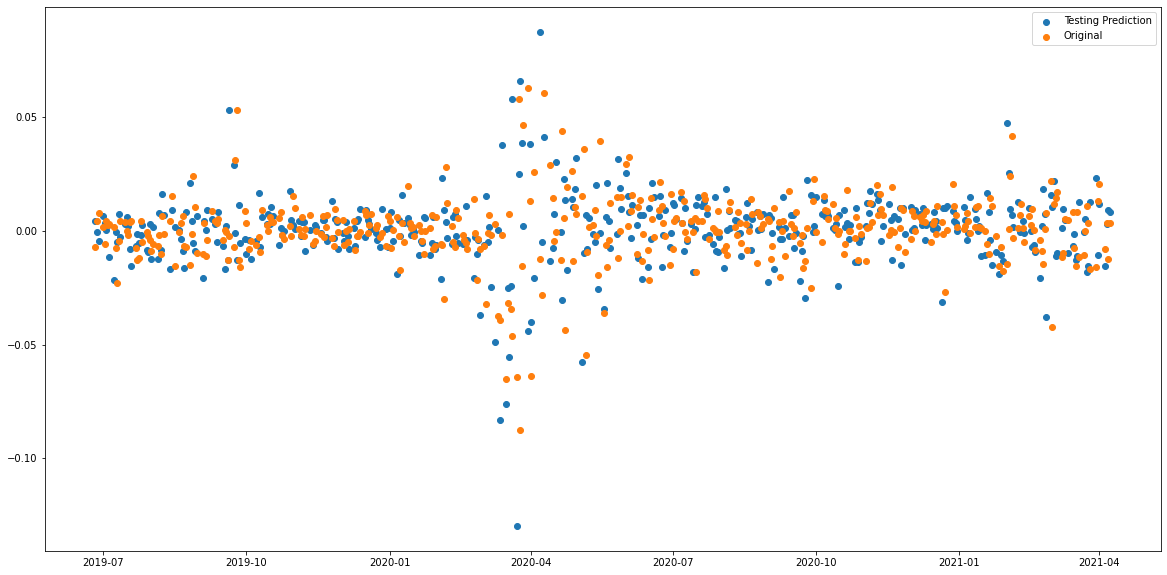

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(index , df['pct_change_original'] , label='Testing Prediction')
plt.scatter(index , df['pct_change_predicted'] ,label='Original')
plt.legend()
plt.show()

In [69]:
np.mean(df['pct_change_original']) - np.mean(df['pct_change_predicted'])

8.238767072753477e-05

## calc

In [70]:
spot_price = np.arange(1990 , 2110 , 10)
spot_price

array([1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090,
       2100])

In [78]:
strike = 2050
premium = 6.35

In [87]:
for i in range(len(spot_price)):
    out = max(0 , int(spot_price[i] - strike)) - premium
    print(out)

-6.35
-6.35
-6.35
-6.35
-6.35
-6.35
-6.35
3.6500000000000004
13.65
23.65
33.65
43.65
